In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Features and labels
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Check the shape
print("Data shape:", X.shape)
print("Target shape:", y.shape)


Data shape: (70000, 784)
Target shape: (70000,)


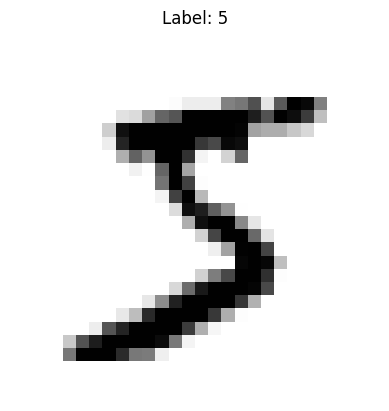

In [2]:
some_digit = X[0]  # Let's look at the first digit
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.title(f"Label: {y[0]}")
plt.axis("off")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

# Split into training (60k) and test (10k)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (60000, 784)
Test set shape: (10000, 784)


In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Create and train the SGD Classifier
sgd_clf = SGDClassifier(loss="hinge", random_state=42)
sgd_clf.fit(X_train, y_train)

# Make predictions
y_pred_sgd = sgd_clf.predict(X_test)

# Evaluate accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("SGD Classifier Accuracy:", round(accuracy_sgd * 100, 2), "%")


SGD Classifier Accuracy: 86.91 %


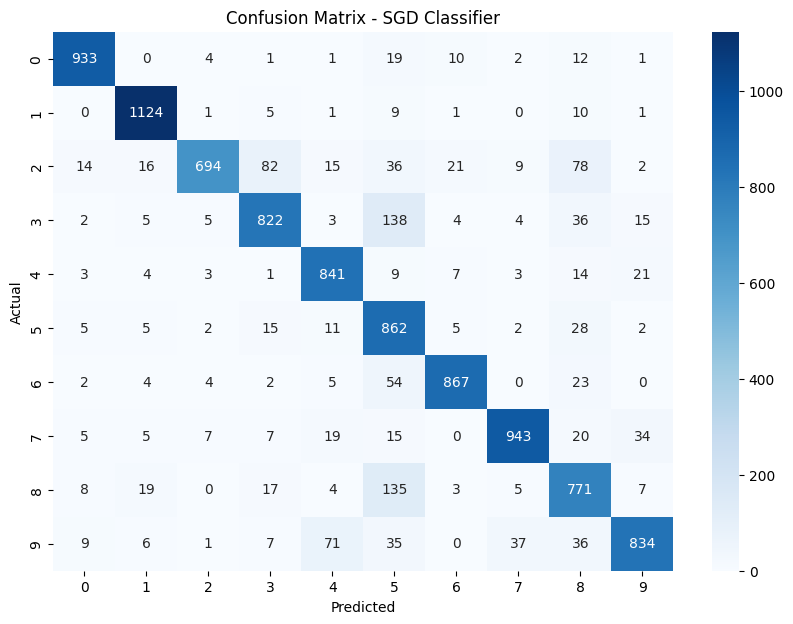

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_sgd)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SGD Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [6]:
# Classification Report
print("Classification Report - SGD Classifier:\n")
print(classification_report(y_test, y_pred_sgd))


Classification Report - SGD Classifier:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       983
           1       0.95      0.98      0.96      1152
           2       0.96      0.72      0.82       967
           3       0.86      0.79      0.82      1034
           4       0.87      0.93      0.90       906
           5       0.66      0.92      0.77       937
           6       0.94      0.90      0.92       961
           7       0.94      0.89      0.92      1055
           8       0.75      0.80      0.77       969
           9       0.91      0.81      0.85      1036

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", round(accuracy_rf * 100, 2), "%")


Random Forest Classifier Accuracy: 96.74 %


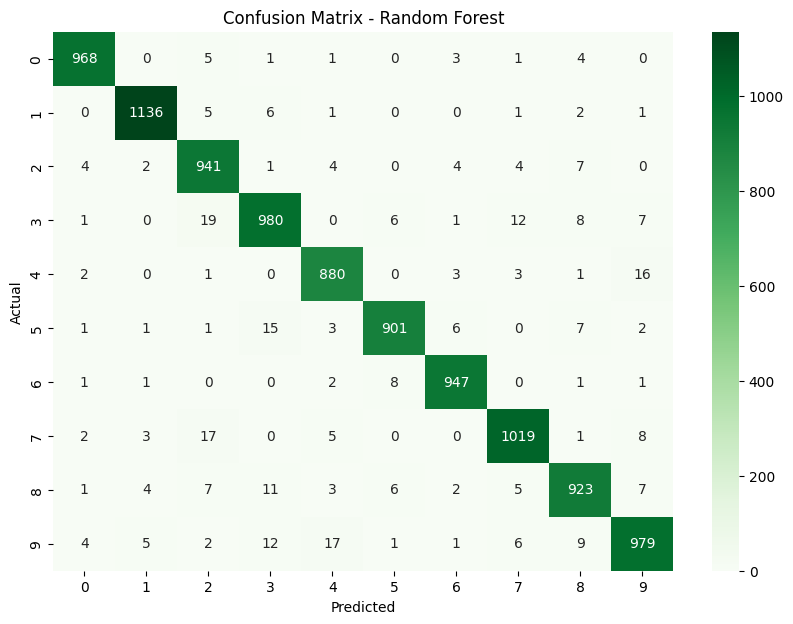

In [8]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
print("Classification Report - Random Forest Classifier:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.94      0.97      0.96       967
           3       0.96      0.95      0.95      1034
           4       0.96      0.97      0.97       906
           5       0.98      0.96      0.97       937
           6       0.98      0.99      0.98       961
           7       0.97      0.97      0.97      1055
           8       0.96      0.95      0.96       969
           9       0.96      0.94      0.95      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



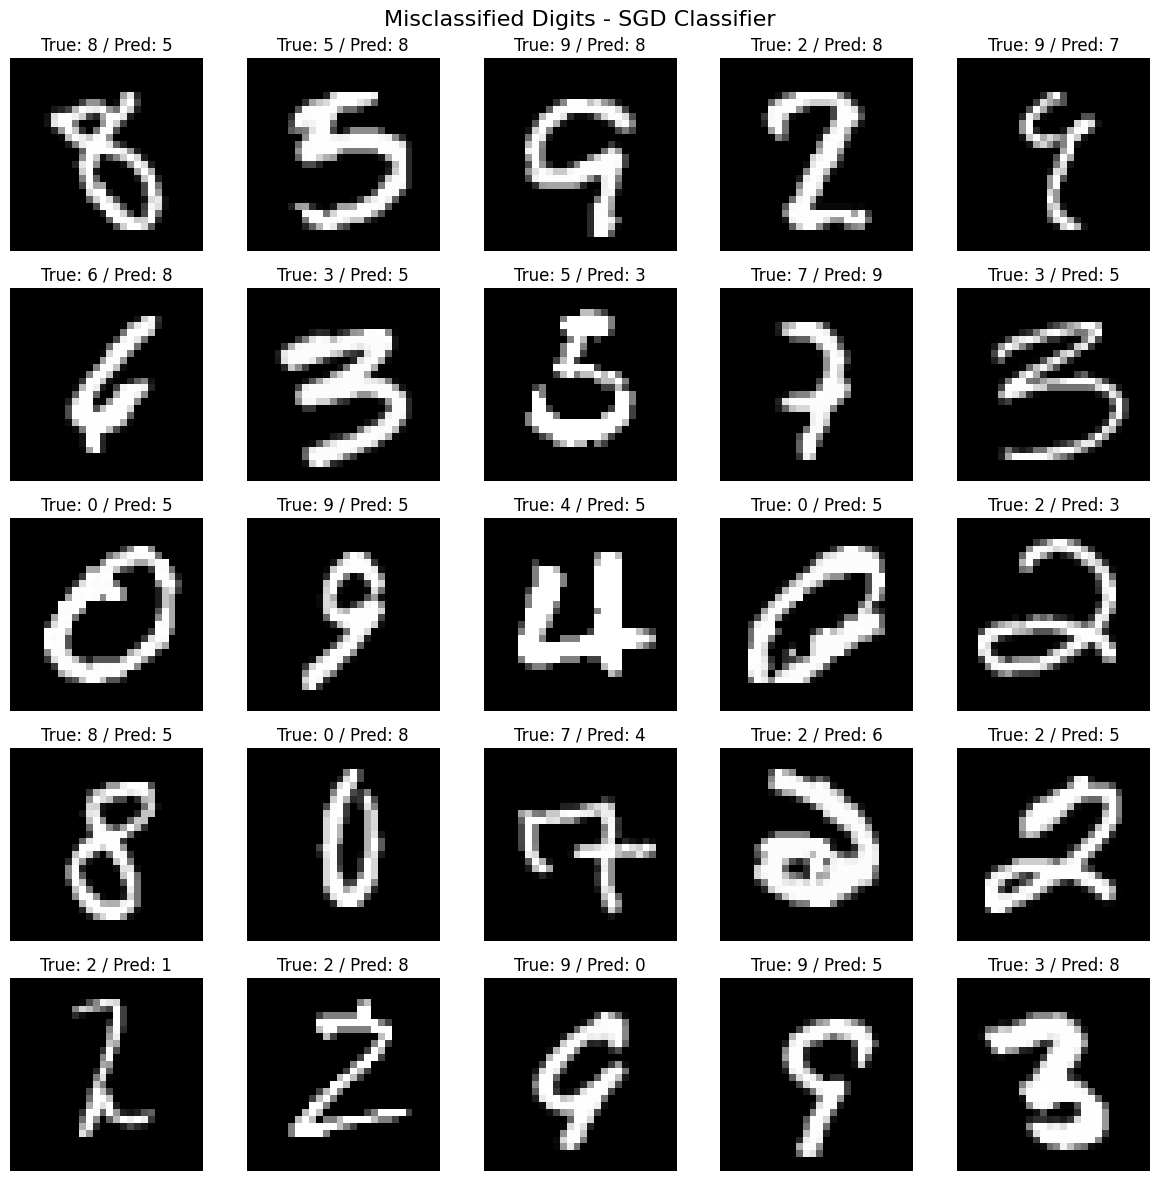

In [11]:
# Find misclassified examples
misclassified_indices = np.where(y_test != y_pred_sgd)[0]

# Show a few of the worst predictions
plt.figure(figsize=(12, 12))
for i, wrong in enumerate(misclassified_indices[:25]):
    plt.subplot(5, 5, i + 1)
    image = X_test[wrong].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {y_test[wrong]} / Pred: {y_pred_sgd[wrong]}")
    plt.axis('off')
plt.suptitle("Misclassified Digits - SGD Classifier", fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalize pixel values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain SGD with scaled data
sgd_scaled = SGDClassifier(loss="hinge", random_state=42)
sgd_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = sgd_scaled.predict(X_test_scaled)

# New accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("SGD Accuracy after scaling:", round(accuracy_scaled * 100, 2), "%")


SGD Accuracy after scaling: 90.27 %


In [13]:
!pip install gradio


In [19]:
!pip uninstall gradio -y


Found existing installation: gradio 5.31.0
Uninstalling gradio-5.31.0:
  Successfully uninstalled gradio-5.31.0


In [20]:
!pip install gradio==3.50.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
  Attempting uninstall: pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: markupsafe
    Found exi

In [1]:
!pip install gradio==3.50.2


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# Optional: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest (used for Gradio app)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [3]:
import gradio as gr
from PIL import Image

def predict_digit(image):
    image = Image.fromarray(image).convert("L").resize((28, 28))
    image_array = np.array(image).reshape(1, -1)
    prediction = rf_clf.predict(image_array)[0]
    return f"Predicted Digit: {prediction}"

interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(shape=(200, 200), image_mode='L', invert_colors=True, source="canvas"),
    outputs="text",
    title="MNIST Digit Recognizer",
    description="Draw a digit (0–9) and get prediction using Random Forest"
)

interface.launch(share=True)


IMPORTANT: You are using gradio version 3.50.2, however version 4.44.1 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8ef8a3e2fa3a407a8d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
